Hypothesis: the companies with more than 1B in cash/assets have a significant difference in returns by the end of the year than companies which don't have. 

In [11]:
%reload_ext nb_black


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import math
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.graphics.gofplots import qqplot


%matplotlib inline
plt.style.use("fivethirtyeight")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
def get_95_ci(x1, x2):
    """Calculate a 95% CI for 2 1d numpy arrays"""
    signal = x1.mean() - x2.mean()
    noise = np.sqrt(x1.var() / x1.size + x2.var() / x2.size)

    ci_lo = signal - 1.96 * noise
    ci_hi = signal + 1.96 * noise

    return ci_lo, ci_hi


%matplotlib inline

# what are we achieving from here? defining the function of 95%? giving the formula
# whats matplotlib inline?

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
stocks = pd.read_csv(r"C:\Users\GaukharJavarova\Downloads\aggdata.csv")
stocks.head()

,ticker,revenue,pb,debt,assets,netmargin,ncfo,shareswa,sps,opinc,...,netinccmn,fcfps,PX_TO_BOOK_RATIO,RETURN_ON_ASSET,OPER_MARGIN,CASH_FLOW_PER_SHARE,REVENUE_PER_SHARE,PX_FREE_CASH_FLOW,quick_ratio,TOT_DEBT_TO_TOTAL_ASSET
0,ZYME,8269000.0,3.091,9007000.0,636578000.0,-3.765,-37487000.0,48686718.0,0.170,-35880000.0,...,-162932000.0,-2.154,3.091,-0.358217,-4.339098,-0.823549,0.181661,-16.467038,6.807722,0.014149
1,ZYME,1877000.0,7.288,6881000.0,368205000.0,-38.489,-36354000.0,43658717.0,0.043,-73752000.0,...,-145437000.0,-2.319,7.288,-0.409374,-39.292488,-0.922987,0.047655,-19.603277,3.647265,0.018688
2,ZYME,7860000.0,3.146,6755000.0,400037000.0,-3.877,-10880000.0,43445379.0,0.181,-33564000.0,...,-63920000.0,0.004,3.146,-0.197080,-4.270229,-0.277127,0.200204,6200.000000,6.678431,0.016886
3,ZYME,7882000.0,2.112,7829000.0,414547000.0,-3.689,-13317000.0,32837975.0,0.240,-29432000.0,...,-52196000.0,0.028,2.112,-0.191239,-3.734078,-0.415356,0.245839,785.714286,8.874183,0.018886
4,ZYME,11925000.0,3.048,8065000.0,238279000.0,-1.144,-21302000.0,32020437.0,0.372,-14553000.0,...,-28993000.0,0.616,3.048,-0.130571,-1.220377,-0.665162,0.372362,26.266234,6.440652,0.033847


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
# hyperlink_format = <a href="{C:\Users\GaukharJavarova\Downloads\indicators}">{indicators}</a>
# how to put a hyperlink here

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40277 entries, 0 to 40276
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ticker                   40277 non-null  object 
 1   revenue                  39949 non-null  float64
 2   pb                       38433 non-null  float64
 3   debt                     39416 non-null  float64
 4   assets                   39416 non-null  float64
 5   netmargin                38980 non-null  float64
 6   ncfo                     39683 non-null  float64
 7   shareswa                 40072 non-null  float64
 8   sps                      39800 non-null  float64
 9   opinc                    39949 non-null  float64
 10  assetsc                  30302 non-null  float64
 11  liabilitiesc             30265 non-null  float64
 12  price                    38513 non-null  float64
 13  calendardate             40277 non-null  object 
 14  datekey               

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
stocks.shape

(40277, 31)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
stocks["cashneq"].describe()  # here, numbers are given in Millions? go over numbers, 
scientific notation:

SyntaxError: invalid syntax (<ipython-input-18-a893f2630b9f>, line 2)

ERROR:root:Cannot parse: 2:11: scientific notation:
Traceback (most recent call last):
  File "c:\users\gaukharjavarova\appdata\local\programs\python\python38-32\lib\site-packages\lab_black.py", line 218, in format_cell
    formatted_code = _format_code(cell)
  File "c:\users\gaukharjavarova\appdata\local\programs\python\python38-32\lib\site-packages\lab_black.py", line 29, in _format_code
    return format_str(src_contents=code, mode=FileMode())
  File "c:\users\gaukharjavarova\appdata\local\programs\python\python38-32\lib\site-packages\black.py", line 725, in format_str
    src_node = lib2to3_parse(src_contents.lstrip(), mode.target_versions)
  File "c:\users\gaukharjavarova\appdata\local\programs\python\python38-32\lib\site-packages\black.py", line 836, in lib2to3_parse
    raise exc from None
black.InvalidInput: Cannot parse: 2:11: scientific notation:
ERROR:root:Cannot parse: 2:11: scientific notation:
Traceback (most recent call last):
  File "c:\users\gaukharjavarova\appdata\loc

In [ ]:
stats.wilcoxon((cash_rich["return"])) 


In [ ]:
stats.wilcoxon((cash_weak["return"])) 


In [ ]:
cash_rich["return"].max()

In [ ]:
cash_rich["return"].min()

In [ ]:
cash_rich["price"] = (cash_rich["price2019"] - cash_rich["price"]) / cash_rich["price"]
(100 * cash_rich["price"]).hist(bins=50)
plt.xlabel = ("price difference")
plt.ylabel = ("company count")
plt.show()
print(stats.describe(cash_rich["price"]))

In [ ]:
a = stocks["cashneq"].dropna()
b = a.apply(np.log)
b[np.isfinite(b)].hist(bins=40)
plt.show()
# apply log10 when the data is very skewed. log

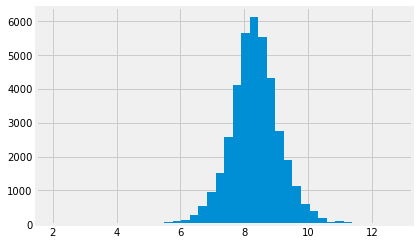

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
a = stocks["cashneq"].dropna()
b = a.apply(np.log10)
b[np.isfinite(b)].hist(bins=40)
plt.show()

# add description on x, y; why does it have NA values? what could it be?
# didn't get this well.
# log, what does it give?
# b[np.isfinite(b)]

In [20]:
stocks["enough_cash"] = np.where(
    stocks["cashneq"] > 1000000000, 1, 0
)  # if more than 1 B yes = 1, if no = 0. instead put "yes", 'no'
#  i'm asking more than 1B but why is 0 here, #can delete np.where, 1, 0; will give True or False.
# 1 could be for stocks having enough cash, but why 0??

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
df2018 = stocks[stocks["calendardate"] == "2018-03-31"] 
#finding every record thats on that date. end of the first quarter. 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
df2018[["ticker", "calendardate", "enough_cash", "cashneq"]].head()

,ticker,calendardate,enough_cash,cashneq
8,ZYME,2018-03-31,0,3.098100e+07
23,ZUO,2018-03-31,0,2.027340e+08
37,ZTS,2018-03-31,1,1.654000e+09
58,ZS,2018-03-31,0,2.874430e+08
72,ZNGA,2018-03-31,0,3.715880e+08


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
df2018.shape

(1985, 32)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
df2018 = stocks[
    stocks["calendardate"] == "2018-03-31"
]  # finding every record for date row and giving it out.

df2019 = stocks[stocks["calendardate"] == "2019-03-31"]  # end of the first quarter
df2019 = df2019.rename(
    columns={"price": "price2019", "calendardate": "calendardate2019"}
)
# from dataframe 2018 took everything, since it's a main one, left all columns in it.
# from 2019 chose only:price, calendardate
# renamed them into +2019. the column calendardate made equal to the dates i need.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
# df2019.info()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
df2018 = pd.merge(
    df2018,
    df2019[["ticker", "price2019", "calendardate2019"]],
    how="inner",
    on="ticker",
)
df2018.info()
# merging here df2019 and df2018 two dataframes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 1984
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ticker                   1985 non-null   object 
 1   revenue                  1982 non-null   float64
 2   pb                       1858 non-null   float64
 3   debt                     1897 non-null   float64
 4   assets                   1897 non-null   float64
 5   netmargin                1922 non-null   float64
 6   ncfo                     1973 non-null   float64
 7   shareswa                 1977 non-null   float64
 8   sps                      1974 non-null   float64
 9   opinc                    1982 non-null   float64
 10  assetsc                  1455 non-null   float64
 11  liabilitiesc             1454 non-null   float64
 12  price                    1865 non-null   float64
 13  calendardate             1985 non-null   object 
 14  datekey                 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
df2018 = df2018.dropna()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

df2018["return"] = (df2018["price2019"] - df2018["price"]) / df2018["price"]  # looking at the percent difference
df2018["return"].hist(bins=20)
plt.show()
print(stats.describe(df2018["return"]))


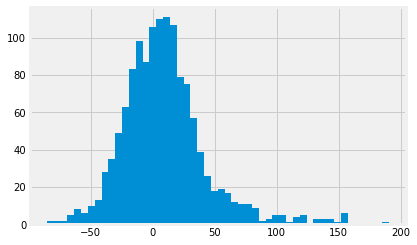

DescribeResult(nobs=1340, minmax=(-0.8544848484848484, 1.9018567639257293), mean=0.09442153640200235, variance=0.11888521649064611, skewness=1.144651524691345, kurtosis=3.1507116856549793)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
df2018["return"] = (df2018["price2019"] - df2018["price"]) / df2018["price"]
df2018 = df2018[df2018["return"] <= 2]
(100 * df2018["return"]).hist(bins=50)
plt.show()
print(stats.describe(df2018["return"]))

In [29]:
df2018

,ticker,revenue,pb,debt,assets,netmargin,ncfo,shareswa,sps,opinc,...,OPER_MARGIN,CASH_FLOW_PER_SHARE,REVENUE_PER_SHARE,PX_FREE_CASH_FLOW,quick_ratio,TOT_DEBT_TO_TOTAL_ASSET,enough_cash,price2019,calendardate2019,return
2,ZTS,1.366000e+09,20.675,4.954000e+09,8.690000e+09,0.258,3.890000e+08,485900000.0,2.811,464000000.0,...,0.339678,0.801643,2.815022,29.384236,2.597000,0.570081,1,100.67,2019-03-31,0.205484
4,ZNGA,2.082320e+08,1.940,0.000000e+00,1.919011e+09,0.027,-3.947000e+06,869627000.0,0.239,4257000.0,...,0.020444,-0.004530,0.238964,36.969697,3.170025,0.000000,0,5.33,2019-03-31,0.456284
6,ZIOP,1.460000e+05,-4.533,0.000000e+00,8.746100e+07,-144.795,-1.895700e+07,140853120.0,0.001,-16196000.0,...,-110.931507,-0.133126,0.001025,-9.223529,5.093818,0.000000,0,3.85,2019-03-31,-0.017857
9,ZEN,1.297910e+08,12.352,4.399530e+08,1.112523e+09,-0.226,1.624200e+07,103692000.0,1.252,-33615000.0,...,-0.258993,0.157108,1.255458,200.292887,3.026127,0.395455,0,85.00,2019-03-31,0.775642
10,ZBRA,9.770000e+08,7.555,2.133000e+09,4.249000e+09,0.112,1.160000e+08,53286249.0,18.335,144000000.0,...,0.147390,2.178402,18.347406,17.576714,0.574034,0.502000,0,209.53,2019-03-31,0.505352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,AAP,2.873848e+09,2.164,1.044755e+09,8.614953e+09,0.048,1.539700e+08,73979000.0,38.847,198241000.0,...,0.068981,2.081291,38.847270,13.433454,0.361917,0.121272,0,175.40,2019-03-31,0.690439
1980,AAON,9.908200e+07,8.534,0.000000e+00,3.069450e+08,0.043,1.074400e+07,52433902.0,1.890,5178000.0,...,0.052260,0.204908,1.889680,141.304348,1.352039,0.000000,0,46.18,2019-03-31,0.184103
1982,AAL,1.040100e+10,-24.150,2.473900e+10,5.328000e+10,0.015,1.800000e+09,473138683.0,21.983,396000000.0,...,0.038073,3.804381,21.982984,-37.354421,0.434737,0.464321,0,31.76,2019-03-31,-0.388761
1983,AA,3.090000e+09,1.559,1.460000e+09,1.709600e+10,0.063,5.500000e+07,186175616.0,16.597,517000000.0,...,0.167314,0.295420,16.597233,10.502219,0.738239,0.085400,1,28.16,2019-03-31,-0.373665


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

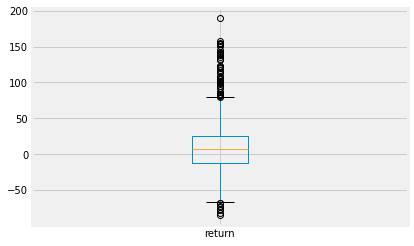

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
(100 * df2018["return"]).plot.box()
# do the drop() of more than
# drop the high percent change observations

# and re-look at the distribution

# (skew/kurtosis)

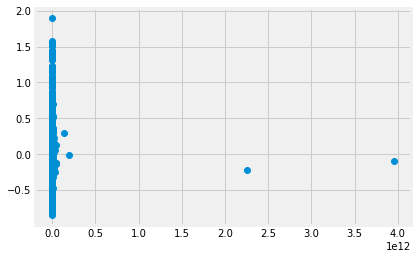

DescribeResult(nobs=1340, minmax=(0.0, 3953513000000.0), mean=5901320083.93209, variance=1.5497371861958475e+22, skewness=28.241213681892198, kurtosis=832.5708717639244)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
plt.plot(df2018["cashneq"], df2018["return"], "o")
plt.show()
print(stats.describe(df2018["cashneq"]))


In [32]:
# df2018[df2018["return"] <= 2]  # i'm taking only those who made less than 200%

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
df2018[df2018["enough_cash"] == 1]  # for dropping the high % of those above

,ticker,revenue,pb,debt,assets,netmargin,ncfo,shareswa,sps,opinc,...,OPER_MARGIN,CASH_FLOW_PER_SHARE,REVENUE_PER_SHARE,PX_FREE_CASH_FLOW,quick_ratio,TOT_DEBT_TO_TOTAL_ASSET,enough_cash,price2019,calendardate2019,return
2,ZTS,1.366000e+09,20.675,4.954000e+09,8.690000e+09,0.258,3.890000e+08,4.859000e+08,2.811,4.640000e+08,...,0.339678,0.801643,2.815022,29.384236,2.597000,0.570081,1,100.67,2019-03-31,0.205484
11,ZBH,2.017600e+09,1.846,1.111190e+10,2.718120e+10,0.087,4.905000e+08,2.030000e+08,9.939,3.050000e+08,...,0.151170,2.414509,9.931728,16.436539,0.929742,0.408808,1,127.70,2019-03-31,0.171130
16,YNDX,2.657300e+10,5.193,1.790300e+10,2.129050e+11,0.090,5.187000e+09,3.270667e+08,1.422,3.159000e+09,...,0.118880,15.896178,81.436119,0.947406,2.533172,0.084089,1,34.34,2019-03-31,-0.129531
23,XRX,2.435000e+09,1.320,5.489000e+09,1.617500e+10,0.009,2.160000e+08,2.546735e+08,9.561,1.340000e+08,...,0.055031,0.848145,9.561263,-36.476553,2.033312,0.339351,1,31.98,2019-03-31,0.111188
26,XOM,6.821100e+10,1.680,4.061700e+10,3.488260e+11,0.068,8.519000e+09,4.237462e+09,16.097,7.444000e+09,...,0.109132,2.010401,16.097135,21.726849,0.477747,0.116439,1,80.80,2019-03-31,0.082965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1973,ABBV,7.934000e+09,42.303,3.728700e+10,6.934200e+10,0.351,2.645000e+09,1.591000e+09,4.987,2.903000e+09,...,0.365894,1.665646,4.996308,15.134314,0.897819,0.537726,1,80.59,2019-03-31,-0.148547
1974,ABB,6.441000e+09,3.790,7.761000e+09,4.356900e+10,0.089,-5.180000e+08,2.134000e+09,3.018,6.090000e+08,...,0.094551,-0.242214,3.011774,24.274029,0.691978,0.178131,1,18.87,2019-03-31,-0.205139
1978,AAPL,6.113700e+10,6.710,1.218400e+11,3.675020e+11,0.226,1.513000e+10,5.024877e+09,12.167,1.589400e+10,...,0.259974,2.981861,12.049043,15.413872,1.235423,0.331536,1,189.95,2019-03-31,0.132137
1983,AA,3.090000e+09,1.559,1.460000e+09,1.709600e+10,0.063,5.500000e+07,1.861756e+08,16.597,5.170000e+08,...,0.167314,0.295420,16.597233,10.502219,0.738239,0.085400,1,28.16,2019-03-31,-0.373665


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

cash_rich = df2018[df2018["enough_cash"] == 1]
plt.hist(cash_rich["return"])
plt.show()
print(stats.describe(cash_rich["return"]))
# is the data normal, return?

cash_rich = df2018[df2018["enough_cash"] == 1]
plt.hist(cash_rich["price"])
plt.show()
print(stats.describe(cash_rich["price"]))

cash_rich = df2018[df2018["enough_cash"] == 1]
plt.hist(cash_rich["price2019"])
plt.show()
print(stats.describe(cash_rich["price2019"]))

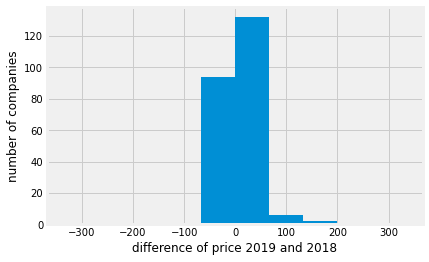

DescribeResult(nobs=237, minmax=(-335.4799999999998, 333.4100000000001), mean=6.503776371308018, variance=1696.5669436235064, skewness=0.044578761054109114, kurtosis=35.68556146728715)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
cash_rich = df2018[df2018["enough_cash"] == 1]
plt.hist(cash_rich["price2019"]- cash_rich['price']) #what I'm plotting
plt.xlabel('difference of price 2019 and 2018') #what i chose to plot
plt.ylabel('number of companies') #y is always count and numbers. 
plt.show()
print(stats.describe(cash_rich["price2019"]-cash_rich['price']))


In [35]:
# df2018 = df2018.dropna()
# print(df2018)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
df2018[df2018["return"] <= 2]

,ticker,revenue,pb,debt,assets,netmargin,ncfo,shareswa,sps,opinc,...,OPER_MARGIN,CASH_FLOW_PER_SHARE,REVENUE_PER_SHARE,PX_FREE_CASH_FLOW,quick_ratio,TOT_DEBT_TO_TOTAL_ASSET,enough_cash,price2019,calendardate2019,return
2,ZTS,1.366000e+09,20.675,4.954000e+09,8.690000e+09,0.258,3.890000e+08,485900000.0,2.811,464000000.0,...,0.339678,0.801643,2.815022,29.384236,2.597000,0.570081,1,100.67,2019-03-31,0.205484
4,ZNGA,2.082320e+08,1.940,0.000000e+00,1.919011e+09,0.027,-3.947000e+06,869627000.0,0.239,4257000.0,...,0.020444,-0.004530,0.238964,36.969697,3.170025,0.000000,0,5.33,2019-03-31,0.456284
6,ZIOP,1.460000e+05,-4.533,0.000000e+00,8.746100e+07,-144.795,-1.895700e+07,140853120.0,0.001,-16196000.0,...,-110.931507,-0.133126,0.001025,-9.223529,5.093818,0.000000,0,3.85,2019-03-31,-0.017857
9,ZEN,1.297910e+08,12.352,4.399530e+08,1.112523e+09,-0.226,1.624200e+07,103692000.0,1.252,-33615000.0,...,-0.258993,0.157108,1.255458,200.292887,3.026127,0.395455,0,85.00,2019-03-31,0.775642
10,ZBRA,9.770000e+08,7.555,2.133000e+09,4.249000e+09,0.112,1.160000e+08,53286249.0,18.335,144000000.0,...,0.147390,2.178402,18.347406,17.576714,0.574034,0.502000,0,209.53,2019-03-31,0.505352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,AAP,2.873848e+09,2.164,1.044755e+09,8.614953e+09,0.048,1.539700e+08,73979000.0,38.847,198241000.0,...,0.068981,2.081291,38.847270,13.433454,0.361917,0.121272,0,175.40,2019-03-31,0.690439
1980,AAON,9.908200e+07,8.534,0.000000e+00,3.069450e+08,0.043,1.074400e+07,52433902.0,1.890,5178000.0,...,0.052260,0.204908,1.889680,141.304348,1.352039,0.000000,0,46.18,2019-03-31,0.184103
1982,AAL,1.040100e+10,-24.150,2.473900e+10,5.328000e+10,0.015,1.800000e+09,473138683.0,21.983,396000000.0,...,0.038073,3.804381,21.982984,-37.354421,0.434737,0.464321,0,31.76,2019-03-31,-0.388761
1983,AA,3.090000e+09,1.559,1.460000e+09,1.709600e+10,0.063,5.500000e+07,186175616.0,16.597,517000000.0,...,0.167314,0.295420,16.597233,10.502219,0.738239,0.085400,1,28.16,2019-03-31,-0.373665


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

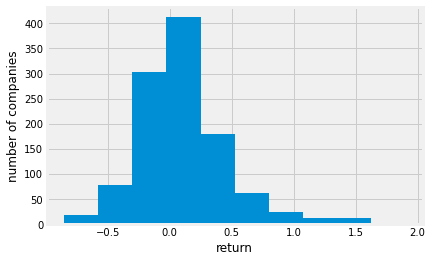

DescribeResult(nobs=1103, minmax=(-0.8544848484848484, 1.9018567639257293), mean=0.10312877521986828, variance=0.13002305445175777, skewness=1.1015188501523943, kurtosis=2.7832849383775278)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
cash_weak = df2018[df2018["enough_cash"] == 0]
plt.hist(cash_weak["return"])
plt.xlabel("return")
plt.ylabel("number of companies")
plt.show()
print(stats.describe(cash_weak["return"]))

# 400 observations = 0.

In [38]:
#df2018[df2018["return"] >= 2]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
# qqplot(cashneq, line="s")
# plt.show()                          why didn't it work?

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
# paired_pain = pain[["audio_book", "control"]]
# paired_pain["diff"] = pain["audio_book"] - pain["control"]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
# paired_pain["diff"].hist()
# plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
#df2018 = cash_rich[['return'], cash_weak['return']]
#df2019["diff"] = [cash_rich['return'] - cash_weak['return']]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
#df2018 = df2018[['price2019'], ['price']]
#df2018['diff'] = [['price2019'] - ['price']]
    


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
df2018["return"] = (df2018["price2019"] - df2018["price"]) / df2018["price"]
(100 * df2018["return"]).hist(bins=50)
plt.show()
print(stats.describe(df2018["return"])) percentage difference

SyntaxError: invalid syntax (<ipython-input-44-bf92bfe0a6ed>, line 4)

ERROR:root:Cannot parse: 4:40: print(stats.describe(df2018["return"])) percentage difference
Traceback (most recent call last):
  File "c:\users\gaukharjavarova\appdata\local\programs\python\python38-32\lib\site-packages\lab_black.py", line 218, in format_cell
    formatted_code = _format_code(cell)
  File "c:\users\gaukharjavarova\appdata\local\programs\python\python38-32\lib\site-packages\lab_black.py", line 29, in _format_code
    return format_str(src_contents=code, mode=FileMode())
  File "c:\users\gaukharjavarova\appdata\local\programs\python\python38-32\lib\site-packages\black.py", line 725, in format_str
    src_node = lib2to3_parse(src_contents.lstrip(), mode.target_versions)
  File "c:\users\gaukharjavarova\appdata\local\programs\python\python38-32\lib\site-packages\black.py", line 836, in lib2to3_parse
    raise exc from None
black.InvalidInput: Cannot parse: 4:40: print(stats.describe(df2018["return"])) percentage difference
ERROR:root:Cannot parse: 4:40: print(stats.descri

In [45]:
# df2018 = df2018[["return"], df2018["return"]]
# df2019["diff"] = [cash_rich["return"] - cash_weak["return"]]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [46]:
df2018["diff"].hist()
plt.show()

KeyError: 'diff'

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
# stats.ttest_ind(cash_rich["return"].dropna(), cash_weak["return"].dropna())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ttest shows the significant difference between values, therefore rejecting the null hypotheses. 
    We see that companies, which have cash and equivalents on hands tend to perform better than those which don't have. We can see the differences in returns in both groups, while companies with no cash loose money when cash_rich companies ACTUALLY DIDN'T GET THE INTERPRETATION OF THIS CHART. 
    what's the confidence interval here??

Non-normal: Mann-Whitney U (independent)

dependent data, non-normal, where all participants experience both versions. non-normally distributed. 

In [48]:
stats.wilcoxon((cash_rich["price2019"] - cash_rich["price"]))
# we see the significant difference in price, p<5; cash_rich companies are more stable

WilcoxonResult(statistic=10821.5, pvalue=0.0019070024286512303)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
cash_rich.head()

,ticker,revenue,pb,debt,assets,netmargin,ncfo,shareswa,sps,opinc,...,OPER_MARGIN,CASH_FLOW_PER_SHARE,REVENUE_PER_SHARE,PX_FREE_CASH_FLOW,quick_ratio,TOT_DEBT_TO_TOTAL_ASSET,enough_cash,price2019,calendardate2019,return
2,ZTS,1.366000e+09,20.675,4.954000e+09,8.690000e+09,0.258,3.890000e+08,4.859000e+08,2.811,4.640000e+08,...,0.339678,0.801643,2.815022,29.384236,2.597000,0.570081,1,100.67,2019-03-31,0.205484
11,ZBH,2.017600e+09,1.846,1.111190e+10,2.718120e+10,0.087,4.905000e+08,2.030000e+08,9.939,3.050000e+08,...,0.151170,2.414509,9.931728,16.436539,0.929742,0.408808,1,127.70,2019-03-31,0.171130
16,YNDX,2.657300e+10,5.193,1.790300e+10,2.129050e+11,0.090,5.187000e+09,3.270667e+08,1.422,3.159000e+09,...,0.118880,15.896178,81.436119,0.947406,2.533172,0.084089,1,34.34,2019-03-31,-0.129531
23,XRX,2.435000e+09,1.320,5.489000e+09,1.617500e+10,0.009,2.160000e+08,2.546735e+08,9.561,1.340000e+08,...,0.055031,0.848145,9.561263,-36.476553,2.033312,0.339351,1,31.98,2019-03-31,0.111188
26,XOM,6.821100e+10,1.680,4.061700e+10,3.488260e+11,0.068,8.519000e+09,4.237462e+09,16.097,7.444000e+09,...,0.109132,2.010401,16.097135,21.726849,0.477747,0.116439,1,80.80,2019-03-31,0.082965


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

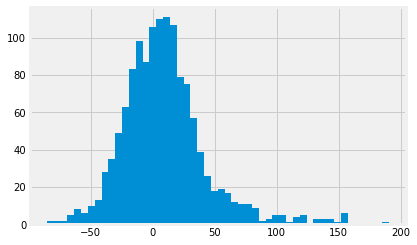

DescribeResult(nobs=1340, minmax=(-0.8544848484848484, 1.9018567639257293), mean=0.09442153640200235, variance=0.11888521649064611, skewness=1.144651524691345, kurtosis=3.1507116856549793)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [50]:
df2018["return"] = (df2018["price2019"] - df2018["price"]) / df2018["price"]
(100 * df2018["return"]).hist(bins=50)
plt.xlabel = "return"
plt.ylabel = "company count"
plt.show()
print(stats.describe(df2018["return"]))  # percentage difference

In [51]:
cash_rich.min()

ticker                               A
revenue                     -1.065e+09
pb                            -379.606
debt                                 0
assets                       2.047e+09
netmargin                       -0.722
ncfo                      -3.77292e+09
shareswa                    4.8349e+07
sps                             -1.712
opinc                        -9.81e+08
assetsc                      1.419e+09
liabilitiesc                 3.185e+08
price                             4.88
calendardate                2018-03-31
datekey                     2018-02-04
sharesbas                  4.82886e+07
equity                      -1.235e+10
receivables                          0
investmentsc                         0
cashneq                      1.001e+09
assetsavg                  2.05890e+09
netinccmn                   -5.456e+09
fcfps                           -26.17
PX_TO_BOOK_RATIO              -379.606
RETURN_ON_ASSET              -0.202563
OPER_MARGIN              

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [52]:
cash_rich.max()

ticker                             ZTS
revenue                    7.58254e+12
pb                             6930.02
debt                       1.93476e+13
assets                     5.03082e+13
netmargin                         1.17
ncfo                       1.31607e+12
shareswa                    2.0476e+10
sps                            251.844
opinc                      6.29676e+11
assetsc                    1.81527e+13
liabilitiesc               1.77969e+13
price                          2080.39
calendardate                2018-03-31
datekey                     2018-05-05
sharesbas                  2.02349e+10
equity                      1.8736e+13
receivables                1.85614e+13
investmentsc               2.05388e+12
cashneq                    3.95351e+12
assetsavg                  5.03084e+13
netinccmn                  2.49398e+12
fcfps                          1262.49
PX_TO_BOOK_RATIO               6930.02
RETURN_ON_ASSET               0.298666
OPER_MARGIN              

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [53]:
cash_weak.min()

ticker                             AAL
revenue                   -5.00722e+09
pb                            -338.416
debt                                 0
assets                      4.3613e+07
netmargin                      -5503.8
ncfo                        -3.574e+09
shareswa                        901543
sps                            -41.291
opinc                       -2.281e+09
assetsc                    1.83028e+06
liabilitiesc               1.27102e+06
price                             1.89
calendardate                2018-03-31
datekey                     2018-02-02
sharesbas                       808380
equity                      -6.754e+09
receivables                          0
investmentsc                         0
cashneq                              0
assetsavg                  4.45035e+07
netinccmn                  -3.6444e+09
fcfps                           -26.51
PX_TO_BOOK_RATIO              -338.416
RETURN_ON_ASSET               -1.46445
OPER_MARGIN              

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [54]:
cash_weak.max()


ticker                            ZNGA
revenue                     3.1649e+10
pb                              293.39
debt                        7.0949e+10
assets                     1.63494e+11
netmargin                        5.396
ncfo                         3.194e+09
shareswa                     4.491e+09
sps                            1348.94
opinc                        1.299e+09
assetsc                    4.10548e+10
liabilitiesc               3.94453e+10
price                             4265
calendardate                2018-03-31
datekey                     2018-05-05
sharesbas                  4.49186e+09
equity                     7.23279e+10
receivables                 1.1669e+10
investmentsc               3.91793e+10
cashneq                      9.992e+08
assetsavg                  1.64516e+11
netinccmn                    9.908e+09
fcfps                            73.47
PX_TO_BOOK_RATIO                293.39
RETURN_ON_ASSET                1.29349
OPER_MARGIN              

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [55]:
cash_weak.max()

ticker                            ZNGA
revenue                     3.1649e+10
pb                              293.39
debt                        7.0949e+10
assets                     1.63494e+11
netmargin                        5.396
ncfo                         3.194e+09
shareswa                     4.491e+09
sps                            1348.94
opinc                        1.299e+09
assetsc                    4.10548e+10
liabilitiesc               3.94453e+10
price                             4265
calendardate                2018-03-31
datekey                     2018-05-05
sharesbas                  4.49186e+09
equity                     7.23279e+10
receivables                 1.1669e+10
investmentsc               3.91793e+10
cashneq                      9.992e+08
assetsavg                  1.64516e+11
netinccmn                    9.908e+09
fcfps                            73.47
PX_TO_BOOK_RATIO                293.39
RETURN_ON_ASSET                1.29349
OPER_MARGIN              

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [56]:
stats.wilcoxon((cash_weak["price2019"] - cash_weak["price"])) 
#not stable, how different? explore best_performers and worst. 
#find out which ones made the most. 


WilcoxonResult(statistic=220652.0, pvalue=2.436253011271826e-15)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [57]:
#stats.wilcoxon?all
#Null hypothesis
#The medians of the 2 groups are the same
#Alternative hypothesis
#The medians of the 2 groups are different


SyntaxError: invalid syntax (<ipython-input-57-bd2933cf8191>, line 1)

ERROR:root:Cannot parse: 1:14: stats.wilcoxon?all
Traceback (most recent call last):
  File "c:\users\gaukharjavarova\appdata\local\programs\python\python38-32\lib\site-packages\lab_black.py", line 218, in format_cell
    formatted_code = _format_code(cell)
  File "c:\users\gaukharjavarova\appdata\local\programs\python\python38-32\lib\site-packages\lab_black.py", line 29, in _format_code
    return format_str(src_contents=code, mode=FileMode())
  File "c:\users\gaukharjavarova\appdata\local\programs\python\python38-32\lib\site-packages\black.py", line 725, in format_str
    src_node = lib2to3_parse(src_contents.lstrip(), mode.target_versions)
  File "c:\users\gaukharjavarova\appdata\local\programs\python\python38-32\lib\site-packages\black.py", line 836, in lib2to3_parse
    raise exc from None
black.InvalidInput: Cannot parse: 1:14: stats.wilcoxon?all
ERROR:root:Cannot parse: 1:14: stats.wilcoxon?all
Traceback (most recent call last):
  File "c:\users\gaukharjavarova\appdata\local\pro

In [58]:
# pvalue less than 0.5 so it's still not normal, what am i gonna do?? conduct a new hypothesis.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [59]:
# which mean is bigger, how much is it? how are they different?
#% difference.
# conclusion: you might invest in big stocks give suggestions to the audience, what they want to know.
# out of these rich stocks who were the best and worst performers?

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>